In [11]:
import random
import math
import statistics
import matplotlib.pyplot as plt

In [32]:
#heads is 1
#tails is 0

def coin_flipper():
    return random.randint(0, 1)

def flipper_count(n=(2**16)):
    heads = 0
    tails = 0
    for _ in range(n):
        if coin_flipper() == 1:
            heads += 1
        else:
            tails += 1
    return (heads, tails)
    
def flipper_intervals():
    return [flipper_count(2**x) for x in [0, 1, 2, 4, 8, 16]]
    


In [21]:
%matplotlib inline

In [36]:
y = flipper_intervals()

In [37]:
print(y)

[(0, 1), (1, 1), (0, 4), (7, 9), (127, 129), (32893, 32643)]


In [46]:
def heads_tails_diff(flips):
    return [h - t for h, t in flips]

def heads_tails_ratio(flips):
    return [h/t for h, t in flips]

In [47]:
diffs = heads_tails_diff(y)
ratio = heads_tails_ratio(y)

In [56]:
print(diffs)
print(ratio)

[-1, 0, -4, -2, -2, 250]
[0.0, 1.0, 0.0, 0.7777777777777778, 0.9844961240310077, 1.0076586098091473]


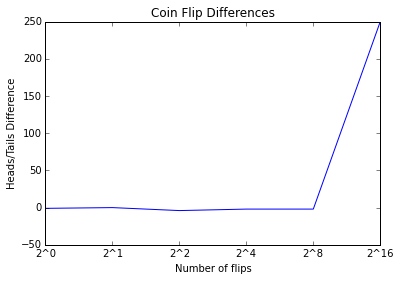

In [50]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(diffs)
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")

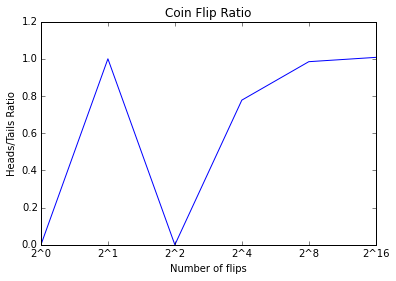

In [48]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(ratio)
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")

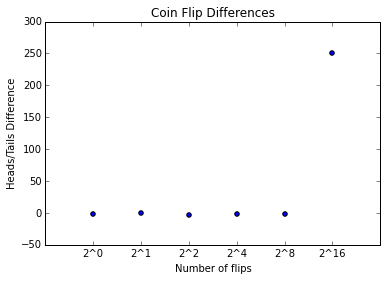

In [61]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
diff = [-1, 0, -4, -2, -2, 250]
plt.scatter(range(6), diff)
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")

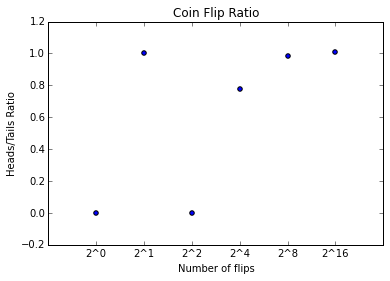

In [62]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.scatter(range(6), ratio)
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")